In [1]:
from datasets import load_dataset

dataset = load_dataset("mrm8488/fake-news")
dataset = dataset['train'].train_test_split(test_size=0.2)

# Split out sets
train_ds = dataset['train']
test_ds = dataset['test']


c:\Users\super\Documents\CSE Projects\FakeNewsDetector\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 44898/44898 [00:01<00:00, 25984.86 examples/s]


In [2]:
import pandas as pd

train_df = train_ds.to_pandas()
test_df = test_ds.to_pandas()


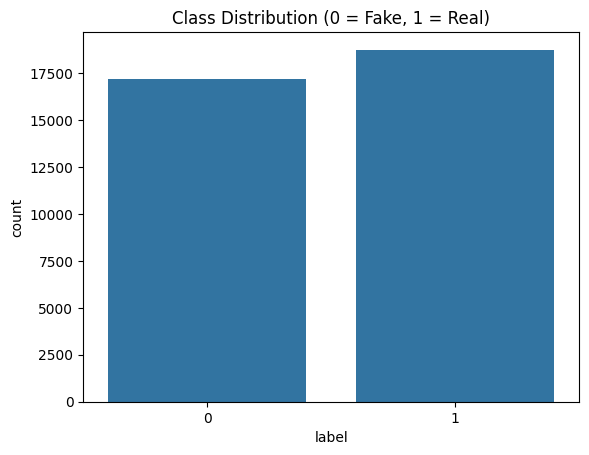

label
1    18743
0    17175
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x="label")
plt.title("Class Distribution (0 = Fake, 1 = Real)")
plt.show()

# Optional: exact counts
print(train_df['label'].value_counts())


In [5]:
print(train_df.isnull().sum())

# You can also visually inspect
print(train_df.sample(5))


text     0
label    0
dtype: int64
                                                    text  label
29516  A federal aid package was all set to pass the ...      1
26424  MOSCOW (Reuters) - Russia s lower house of par...      0
12155  The information below is disturbing and should...      1
14098   There are people out there who are giving the...      1
21622  CARACAS (Reuters) - Cuba’s main regional ally,...      0


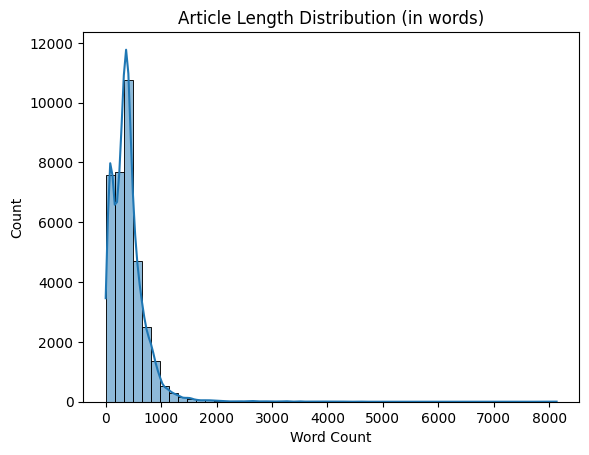

In [6]:
# Add new column for text length
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

# Plot distribution
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title("Article Length Distribution (in words)")
plt.xlabel("Word Count")
plt.show()


In [7]:
print("Min:", train_df['text_length'].min())
print("Max:", train_df['text_length'].max())
print("Mean:", train_df['text_length'].mean())


Min: 0
Max: 8135
Mean: 404.48017706999275
